# Dataset Exploration

In [1]:
import numpy as np
import pandas as pd
import math
from pprint import pprint

In [2]:
class Dataset():
    def __init__(self, path, project_id, percent=1, train=True):
        self.path = path
        self.project_id = project_id
        self.percent = percent
        self.train = train

In [3]:
# Taken from sev.py implementation
def _load_data(dataset):
    '''Helper function to load_data. Reads in file for a single dataset given.

    Args:
        dataset: A Dataset object (Dataset object defined below)

    Returns:
        A numpy array with the required columns from dataset.
    '''
    df = pd.read_csv(dataset.path, sep=',', encoding='ISO-8859-1')
    raw_data = np.array(df)

    # get the columns for Subject and Severity Rating
    extract_cols = [1, 2]
    del_cols = np.delete(np.arange(raw_data.shape[1]), extract_cols)
    data = np.delete(raw_data, del_cols, axis=1)

    # check for possible NaN severity values
    del_rows = []
    for i in range(len(data)):
        if math.isnan(data[i][1]):
            del_rows.append(i)

    # delete rows that contain NaN severity values
    if len(del_rows) > 0:
        data = np.delete(data, del_rows, axis=0)

    # add column for project id
    dataset_size = len(data)
    project_id_column = [dataset.project_id for i in range(dataset_size)]
    data = np.insert(data, 2, project_id_column, axis=1)

    # filter dataset percent
    if dataset.percent != 1:
        size = len(data)
        train_size = int(size * dataset.percent)
        if dataset.train:
            # delete row not needed from last row
            data = np.delete(data, slice(train_size, size), axis=0)

            #print('Range to delete: ', train_size, '-', size)
        else:
            # delete rows not needed from first row
            data = np.delete(data, slice(0, train_size), axis=0)

            #print('Range to delete: ', 0, '-', train_size)

        #print('Size of Dataset: ', size)
        #print('Size of remaining', len(data))

    return data

## Extract Dataset Properties
Count the number of reports in each dataset as well as the distribution of severity types.

In [4]:
# dataset paths
a = '../../dataset/raw/pitsA.csv'
b = '../../dataset/raw/pitsB.csv'
c = '../../dataset/raw/pitsC.csv'
d = '../../dataset/raw/pitsD.csv'
e = '../../dataset/raw/pitsE.csv'
f = '../../dataset/raw/pitsF.csv'

datasets = (a, b, c, d, e, f)

In [5]:
# count number of reports in each dataset
# count number of each severity type in each dataset
len_datasets = []
dist_datasets = []
for dataset in datasets:
    data = _load_data(Dataset(dataset, project_id=1, percent=1, train=False))
    
    # num of reports
    len_datasets.append(len(data))
    
    # num of each sev type (2, 3, 4, 5)
    dist_data = {}
    for report in data:
        severity = int(report[1])
        if severity in dist_data:
            dist_data[severity] += 1
        else:
            dist_data[severity] = 1
    dist_datasets.append(dist_data)

# print results
for i, num_reports in enumerate(len_datasets):
    print('DATASET: ', datasets[i])
    print('')
    print('Number of Reports: ', num_reports)
    print('Number if Reports per Severity:')
    print(dist_datasets[i])
    print('')
    print('')

('DATASET: ', '../../dataset/raw/pitsA.csv')

('Number of Reports: ', 965)
Number if Reports per Severity:
{2: 325, 3: 375, 4: 239, 5: 26}


('DATASET: ', '../../dataset/raw/pitsB.csv')

('Number of Reports: ', 987)
Number if Reports per Severity:
{2: 23, 3: 523, 4: 382, 5: 59}


('DATASET: ', '../../dataset/raw/pitsC.csv')

('Number of Reports: ', 323)
Number if Reports per Severity:
{3: 133, 4: 181, 5: 9}


('DATASET: ', '../../dataset/raw/pitsD.csv')

('Number of Reports: ', 182)
Number if Reports per Severity:
{2: 1, 3: 167, 4: 13, 5: 1}


('DATASET: ', '../../dataset/raw/pitsE.csv')

('Number of Reports: ', 825)
Number if Reports per Severity:
{2: 24, 3: 517, 4: 243, 5: 41}


('DATASET: ', '../../dataset/raw/pitsF.csv')

('Number of Reports: ', 744)
Number if Reports per Severity:
{1: 1, 2: 9, 3: 477, 4: 209, 5: 48}




# Graph Results

In [6]:
import matplotlib.pyplot as plt

## Number of Reports
The total number of reports in each projects.

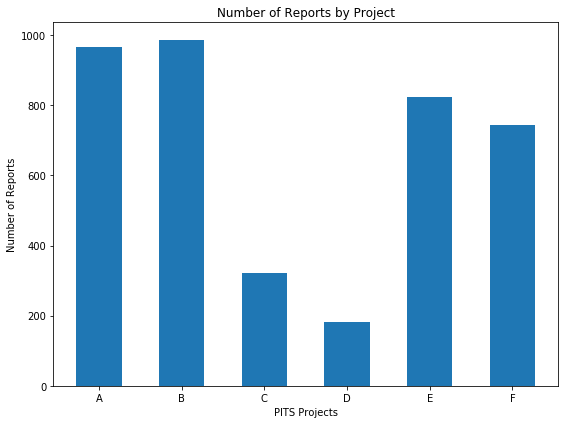

In [7]:
n_projects = 6

n_reports = (965, 987, 323, 182, 825, 744)

fig, ax = plt.subplots(figsize=(8,6))

index = np.arange(n_projects)
bar_width = 0.55

rects = ax.bar(index, n_reports, bar_width)

ax.set_xlabel('PITS Projects')
ax.set_ylabel('Number of Reports')
ax.set_title('Number of Reports by Project')
ax.set_xticks(index)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E','F'))

fig.tight_layout()
plt.show()
fig.savefig('num_reports.png')

## Severity Distribution

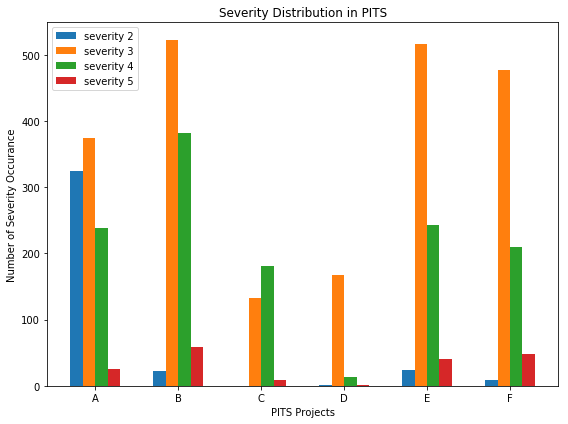

In [8]:
n_projects = 6

severity_2 = (325, 23, 0, 1, 24, 9)
severity_3 = (375, 523, 133, 167, 517, 477)
severity_4 = (239, 382, 181, 13, 243, 209)
severity_5 = (26, 59, 9, 1, 41, 48)

fig, ax = plt.subplots(figsize=(8,6))

index = np.arange(n_projects)
bar_width = 0.15

rects_2 = ax.bar(index, severity_2, bar_width, label='severity 2')
rects_3 = ax.bar(index + bar_width, severity_3, bar_width, label='severity 3')
rects_4 = ax.bar(index + 2*bar_width, severity_4, bar_width, label='severity 4')
rects_5 = ax.bar(index + 3*bar_width, severity_5, bar_width, label='severity 5')

ax.set_xlabel('PITS Projects')
ax.set_ylabel('Number of Severity Occurance')
ax.set_title('Severity Distribution in PITS')
ax.set_xticks(index + 3*bar_width/2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E','F'))
ax.legend()

fig.tight_layout()
plt.show()
fig.savefig('dataset_distributions_bar.png')

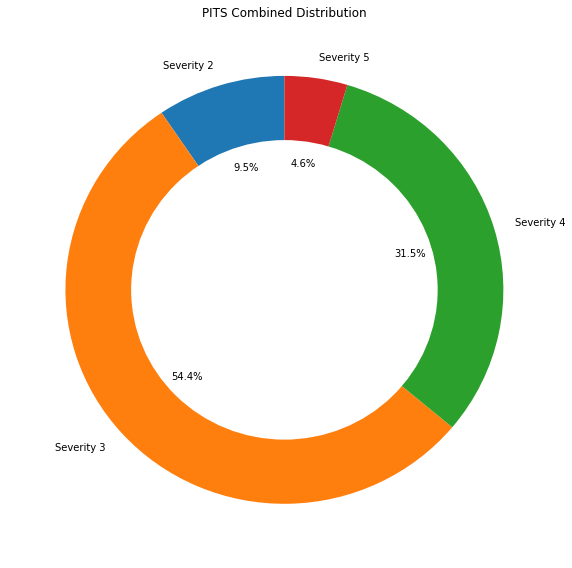

In [9]:
severity_occurances = [382, 2192, 1267, 187]
severity = ['Severity 2','Severity 3', 'Severity 4', 'Severity 5']

fig, ax = plt.subplots(figsize=(8,8))

ax.pie(severity_occurances, labels=severity, startangle=90, autopct='%.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('PITS Combined Distribution')
plt.tight_layout()

plt.show()
fig.savefig('combined_distributions_pie.png')